In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

## Files and Field Descriptions
- train.csv - the training set, comprising measurements of traffic congestion across 65 roadways from April through September of 1991.
    - row_id - a unique identifier for this instance
    - time - the 20-minute period in which each measurement was taken
    - x - the east-west midpoint coordinate of the roadway
    - y - the north-south midpoint coordinate of the roadway
    - direction - the direction of travel of the roadway. EB indicates "eastbound" travel, for example, while SW indicates a "southwest" direction of travel.
    - congestion - congestion levels for the roadway during each hour; the target. The congestion measurements have been normalized to the range 0 to 100.
- test.csv - the test set; you will make hourly predictions for roadways identified by a coordinate location and a direction of travel on the day of 1991-09-30.
- sample_submission.csv - a sample submission file in the correct format

In [2]:
current_directory = os.getcwd()
print(current_directory)
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

D:\GitHub\keras_learning\training_project\tabular-playground-series-mar-2022


In [3]:
train.congestion.value_counts().sort_index()

0      881
1       48
2      256
3      164
4      180
      ... 
96     216
97     104
98      87
99      42
100    222
Name: congestion, Length: 101, dtype: int64

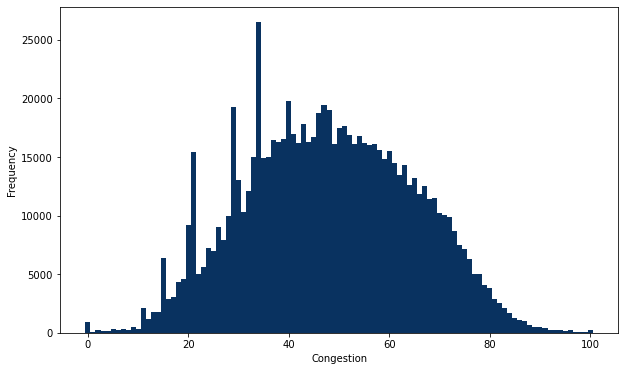

In [4]:
plt.figure(figsize=(10, 6))
plt.bar( range(0,101),train.congestion.value_counts().sort_index(), width=1, color = "#093260")
plt.ylabel('Frequency')
plt.xlabel('Congestion')
plt.show()

In [5]:
unique_x = train.x.unique()
unique_y = train.y.unique()
unique_direction = train.direction.unique()

print("Unique values of x: ", unique_x)
print("Unique values of y: ", unique_y)
print("Unique directions: ", unique_direction)


Unique values of x:  [0 1 2]
Unique values of y:  [0 1 2 3]
Unique directions:  ['EB' 'NB' 'SB' 'WB' 'NE' 'SW' 'NW' 'SE']


directions counts:
 EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64


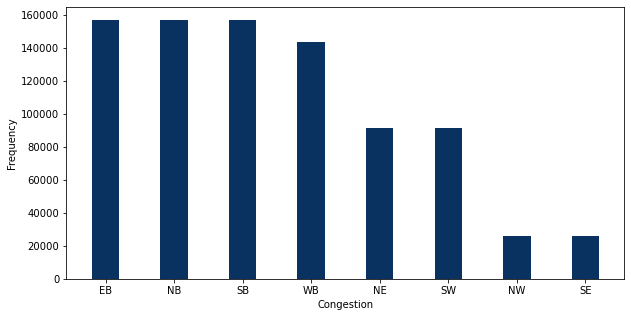

In [6]:
print('directions counts:\n', train.direction.value_counts())

plt.figure(figsize=(10, 5))
plt.bar(unique_direction, train.direction.value_counts(), width=0.4, color = "#093260")

plt.ylabel('Frequency')
plt.xlabel('Congestion')
plt.show()

In [7]:
x_train = pd.concat([train, test])
x_train = x_train.drop('congestion', axis=1)
y_train = train['congestion']

In [8]:
cat_dir = []

### map each color to an integer
mapping = {}

for i in range(unique_direction.shape[0]):
  mapping[unique_direction[i]] = i

# integer representation
for x in x_train.direction:
  cat_dir.append(mapping[x])

In [9]:
x_train.drop('direction',axis =1)
x_train['direction'] = cat_dir

In [10]:
x_train = x_train.drop('row_id',axis =1)

In [11]:
x_train['time'] = pd.to_datetime(x_train['time'])

In [12]:
x_train['month'] = x_train['time'].dt.month
x_train['day'] = x_train['time'].dt.day
x_train['hour'] = x_train['time'].dt.hour
x_train['minute'] = x_train['time'].dt.minute
x_train['second'] = x_train['time'].dt.second
x_train = x_train.drop(['time'],axis=1)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'direction'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'minute'}>,
        <AxesSubplot:title={'center':'second'}>, <AxesSubplot:>]],
      dtype=object)

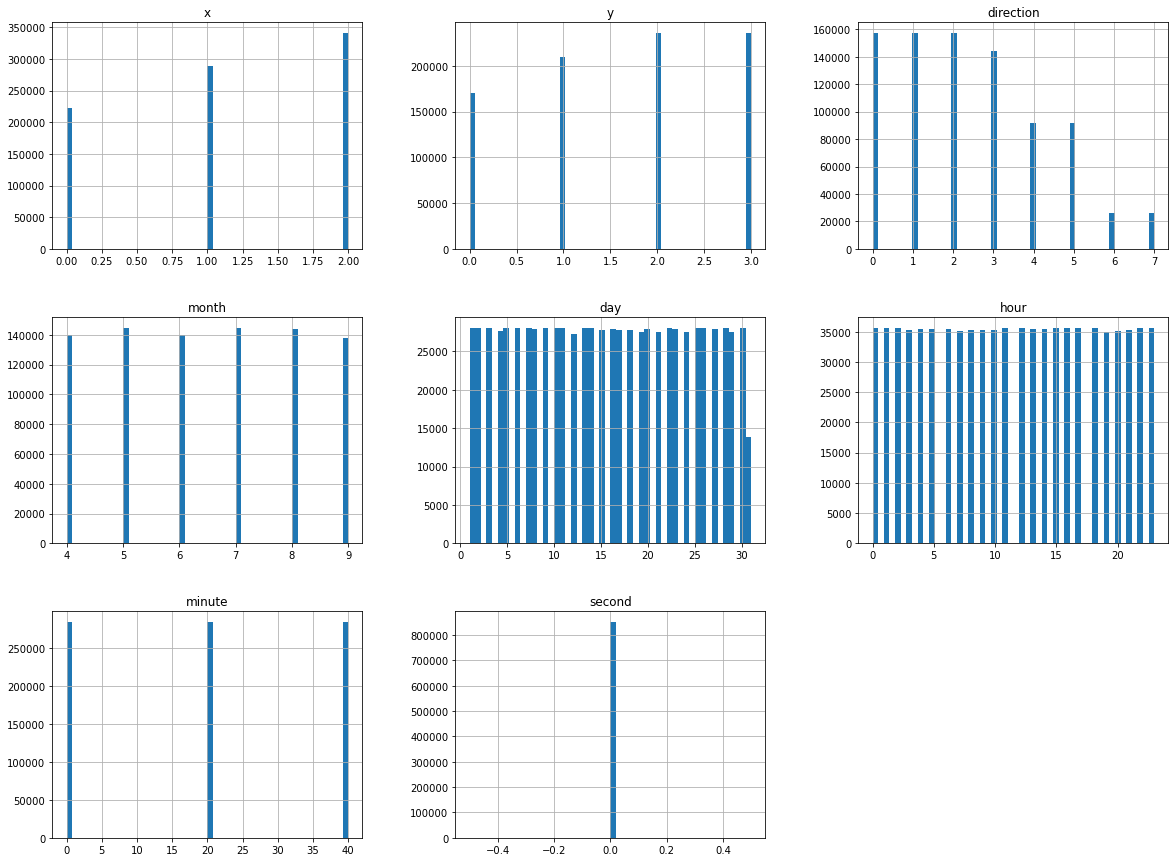

In [13]:
x_train.hist(bins=50, figsize=(20,15))

In [14]:
x_train = x_train.drop(['second'],axis=1)

In [15]:
x_train.head(10)

,x,y,direction,month,day,hour,minute
0,0,0,0,4,1,0,0
1,0,0,1,4,1,0,0
2,0,0,2,4,1,0,0
3,0,1,0,4,1,0,0
4,0,1,1,4,1,0,0
5,0,1,2,4,1,0,0
6,0,1,3,4,1,0,0
7,0,2,0,4,1,0,0
8,0,2,1,4,1,0,0
9,0,2,2,4,1,0,0


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851175 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   x          851175 non-null  int64
 1   y          851175 non-null  int64
 2   direction  851175 non-null  int64
 3   month      851175 non-null  int64
 4   day        851175 non-null  int64
 5   hour       851175 non-null  int64
 6   minute     851175 non-null  int64
dtypes: int64(7)
memory usage: 52.0 MB


In [17]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

In [18]:
x_train.head(10)

,x,y,direction,month,day,hour,minute
0,-1.420452,-1.496971,-1.286808,-1.469052,-1.671976,-1.659647,-1.225493
1,-1.420452,-1.496971,-0.757425,-1.469052,-1.671976,-1.659647,-1.225493
2,-1.420452,-1.496971,-0.228042,-1.469052,-1.671976,-1.659647,-1.225493
3,-1.420452,-0.579017,-1.286808,-1.469052,-1.671976,-1.659647,-1.225493
4,-1.420452,-0.579017,-0.757425,-1.469052,-1.671976,-1.659647,-1.225493
5,-1.420452,-0.579017,-0.228042,-1.469052,-1.671976,-1.659647,-1.225493
6,-1.420452,-0.579017,0.301341,-1.469052,-1.671976,-1.659647,-1.225493
7,-1.420452,0.338937,-1.286808,-1.469052,-1.671976,-1.659647,-1.225493
8,-1.420452,0.338937,-0.757425,-1.469052,-1.671976,-1.659647,-1.225493
9,-1.420452,0.338937,-0.228042,-1.469052,-1.671976,-1.659647,-1.225493


In [19]:
print(y_train.shape[-1])
print(x_train.shape)


848835
(851175, 7)


In [20]:
x_test = x_train[y_train.shape[-1]:]
x_train = x_train[:y_train.shape[-1]]

Spilt train and test form x_train

In [21]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(2340, 7)
(848835, 7)
(848835,)


In [22]:
x_train.to_numpy()
y_train.to_numpy()

array([70, 49, 24, ..., 68, 17, 24], dtype=int64)

In [33]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics

In [46]:
def build_model(input_shape):

        model = Sequential()
        model.add(Dense(32, activation='relu', input_shape=input_shape))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='relu'))
        model.compile(optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=0.001), loss=losses.mse, metrics=metrics.mae)

        return model

In [47]:
import numpy as np

k = 4
num_val_samples = len(x_train) // k
num_epochs = 200
def fitModel(train, target, epochs, input_shape, folds=4):
    all_mae_histories = []
    for i in range(folds):
        print('processing fold #', i)
        # Prepare the validation data: data from partition # k
        val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = target[i * num_val_samples: (i + 1) * num_val_samples]
    
        # Prepare the training data: data from all other partitions
        partial_x_train = np.concatenate(
            [train[:i * num_val_samples],
             train[(i + 1) * num_val_samples:]],
            axis=0)
        partial_y_train = np.concatenate(
            [target[:i * num_val_samples],
             target[(i + 1) * num_val_samples:]],
            axis=0)
    
        # Build the Keras model (already compiled)
        model = build_model(input_shape=input_shape)
        # Train the model (in silent mode, verbose=0)
        history = model.fit(partial_x_train, partial_y_train,
                            validation_data=(val_data, val_targets),
                            epochs=epochs, batch_size=1)
        mae_history = history.history['mae']
        all_mae_histories.append(mae_history)
        return average_mae_history

In [ ]:
all_mae_histories = fitModel(x_train, y_train, num_epochs, input_shape=(x_train.shape[1],))
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
Epoch 1/200
636627/636627 [==============================] - 2614s 4ms/step - loss: 282.2336 - mean_absolute_error: 13.4778 - val_loss: 202.3158 - val_mean_absolute_error: 11.5596
Epoch 2/200
636627/636627 [==============================] - 2583s 4ms/step - loss: 231.3265 - mean_absolute_error: 12.2465 - val_loss: 196.3843 - val_mean_absolute_error: 11.4685
Epoch 3/200
460983/636627 [====================>.........] - ETA: 9:48 - loss: 224.1876 - mean_absolute_error: 11.9770

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()